<a href="https://colab.research.google.com/github/clustering-jun/KMU-Data_Science/blob/main/L08_Principal_Componet_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Principal Componet Analysis Practice**

## **PCA in Scikit-learn**

In [6]:
from sklearn.datasets import load_iris

iris = load_iris()

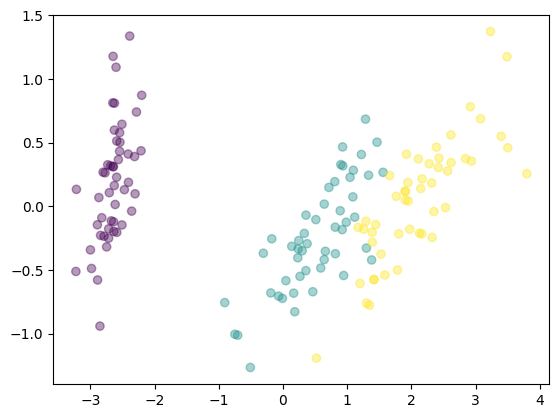

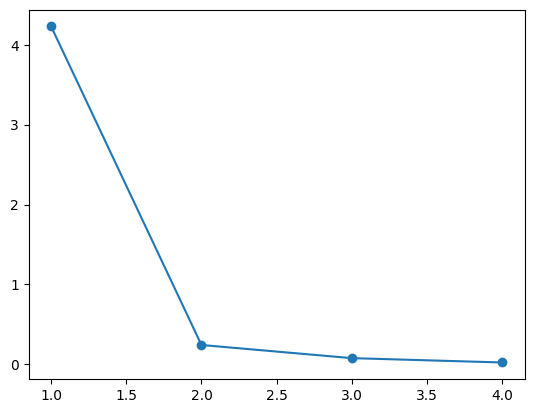

In [20]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = iris['data']

pca = PCA(n_components=4)
Y = pca.fit_transform(X)

plt.scatter(Y[:,0], Y[:,1], c=iris['target'], alpha = 0.4)
plt.show()

# Scree Plot
# 각 주성분의 설명 분산량 --> 보통 '무릎(knee)' 지점에서 중요한 주성분의 개수를 결정한다. (그래프가 급격히 완만해지는 지점)
# 여기서는 2
plt.plot(range(1,5), pca.explained_variance_, '-o')
plt.show()

## **PCA via Eigen Decomposition**
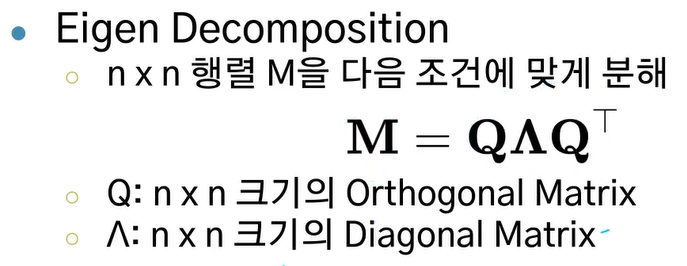

[0.02367619 0.0776881  0.24105294 4.20005343]
[[ 0.31548719  0.58202985  0.65658877 -0.36138659]
 [-0.3197231  -0.59791083  0.73016143  0.08452251]
 [-0.47983899 -0.07623608 -0.17337266 -0.85667061]
 [ 0.75365743 -0.54583143 -0.07548102 -0.3582892 ]]


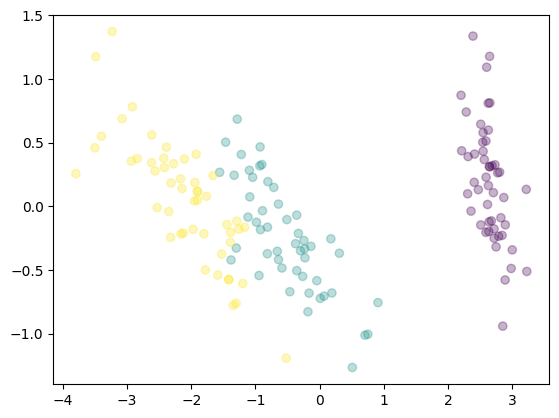

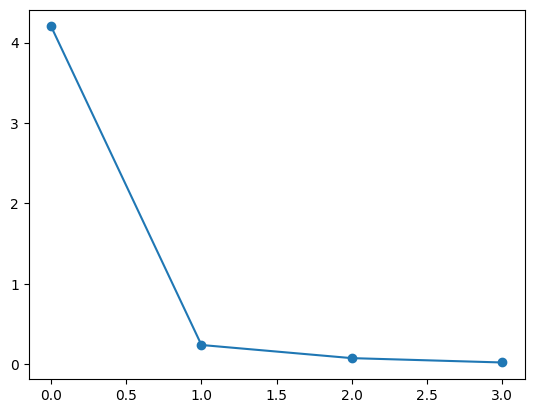

In [27]:
from numpy import linalg

X = iris['data']
X = X - X.mean(axis = 0)

C = (X.T @ X) / len(X)

L, Q = linalg.eigh(C)

Y = X @ Q

print(L) # variance
print(Q)

plt.scatter(Y[:,3], Y[:,2], c=iris['target'], alpha = 0.3)
plt.show()
plt.plot(sorted(L, reverse=True), '-o')
plt.show()

## **PCA via SVD**

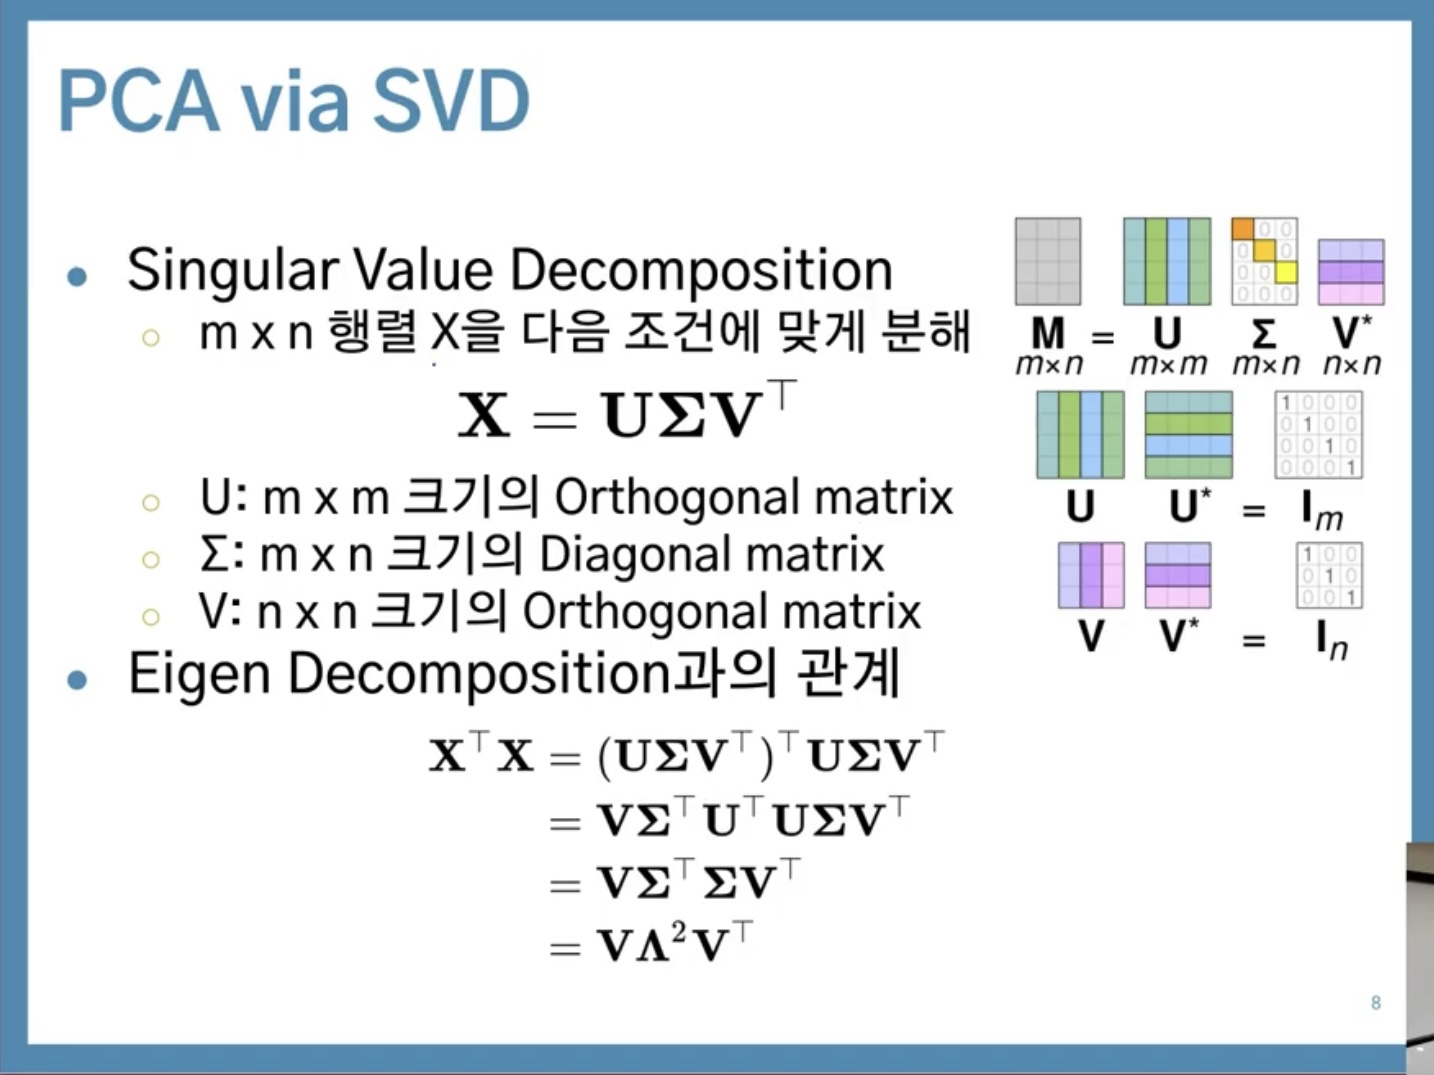

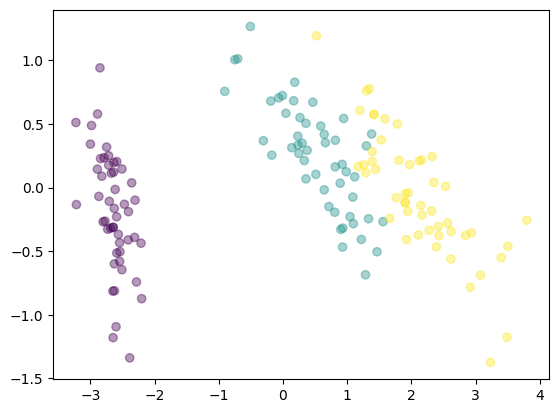

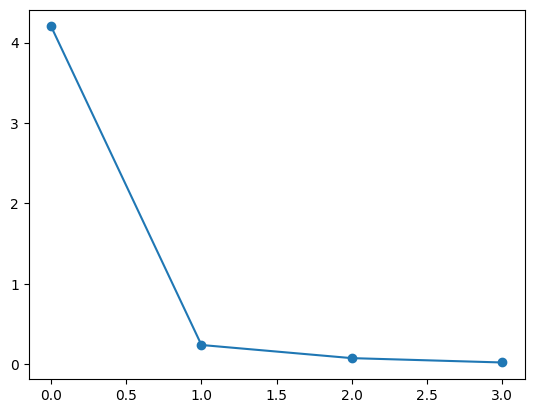

In [35]:
from numpy import linalg

X = iris['data']
X = X - X.mean(axis = 0)

U, S, VT = linalg.svd(X)

Q = VT.T
Y = X @ Q

plt.scatter(Y[:,0], Y[:,1], c=iris['target'], alpha = 0.4)
plt.show()

variance = (S**2) / len(X)
plt.plot(variance, '-o')
plt.show()

## **PCA via Power Method**

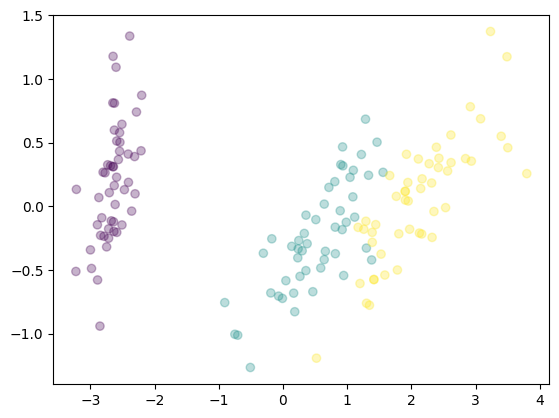

[4.20005343 0.24105294 0.0776881  0.02367619]
[[ 0.36138659  0.65658877  0.58202985  0.31548719]
 [-0.08452251  0.73016143 -0.59791083 -0.3197231 ]
 [ 0.85667061 -0.17337266 -0.07623608 -0.47983899]
 [ 0.3582892  -0.07548102 -0.54583143  0.75365743]]


In [45]:
import numpy as np
from numpy.linalg import norm

X = iris['data']

X = X - X.mean(axis= 0)

C = (X.T @ X) / len(X)

M = C.copy()

L = []
Q = []

for _ in range(4):

    v = np.random.randn(4,1)
    v = v / norm(v)

    for _ in range(20):
        vp = M @ v
        lmb = norm(vp)
        vp = vp / lmb
        v = vp

    M = M - lmb * (v @ v.T)

    Q.append(v)
    L.append(lmb)

L = np.array(L)
Q = np.hstack(Q)

Y = X @ Q
plt.scatter(Y[:,0], Y[:,1], c=iris['target'], alpha = 0.3)
plt.show()

print(L)
print(Q)